In [1]:
import numpy as np
import scipy.linalg
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns
import seaborn.objects as so

##Ejercicio 1

Sabemos que $(I − A)^{−1} = I + A + A^2 + A^3 + . . . + A^n + . . . $

Esto es válido bajo la condición de que la norma de
$𝐴$ sea menor que 1, es decir, $∥𝐴∥<1$. El objetivo es probar que $lim_{n \to ∞}(A^{n+1})=0$, lo cual implica que las potencias de $A$ tienden a cero cuando $n$ crece.

Queremos probar que $\lim_{n \to ∞}(A^{n+1})=0$

El producto de una matriz inversible por su inversa siempre es igual a la matriz identidad. Planteamos:

$(I − A)^{−1} * (I - A) = I$

Desarrollamos junto con el dato de la consigna:

$(I + A + A^2 + A^3 + . . . + A^n + . . . ) * (I - A) = I $
$I*(I + A + A^2 + A^3 + . . . + A^n + . . .) - A*(I + A + A^2 + A^3 + . . . + A^n + . . . ) = I $

$(I + A + A^2 + A^3 + . . . + A^n + . . .) - (A + A^2 + A^3 + A^4. . . + A^{n+1} + . . . ) = I $

Los términos $A, A^2, A^3, ...$ se anulan con sus correspondientes términos negativos. Entonces, para que la ecuación anterior sea válidad, necesitamos que los términos que no se cancelan tiendan a cero cuando n tiende infinito.
En específico el término $A^{n+1}$ debe anularse cuando n sea lo suficientemente grande. Esto es cierto si $||A|| < 1$, ya que en ese caso $lim_{n \to ∞}(A^{n+1})=0$.

Tenemos que:

$I - (A^{n+1}){n \to ∞} = I \Longleftrightarrow \lim_{n \to ∞}(A^{n+1})=0$

Luego, $I = I$, con $\lim_{n \to ∞}(A^{n+1})=0$, como queríamos probar.

## Ejercicio 2

In [2]:
A1 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
[0.24, 0.073, 0.219, 0.013, 0.327],
[0.098, 0.12, 0.311, 0.302, 0.208],
[0.173, 0.03, 0.133, 0.14, 0.074],
[0.303, 0.256, 0.323, 0.225, 0.257]])

In [3]:
A2 = np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
[0.24, 0.073, 0.219, 0.013, 0.327],
[0.098, 0.12, 0.311, 0.302, 0.208],
[0.173, 0.03, 0.133, 0.14, 0.074],
[0.003, 0.256, 0.323, 0.225, 0.257]])

In [4]:
def potencia(A, k):
  if k==0:
    return np.eye(len(A))
  else:
    Ar = A
    for i in range(k-1):
        Ar = A@Ar
    return(Ar)

In [5]:
def norma(A, n):
  a = np.zeros(n)
  for i in range(n):
    Ap = potencia(A, i)
    a[i] = scipy.linalg.norm(Ap, 2)
  return a

In [6]:
np.set_printoptions(precision=3)
vector = norma(A1, 250)
vector[:8]

array([1.   , 1.039, 1.035, 1.038, 1.037, 1.037, 1.037, 1.037])

Analizando las primeras coordenadas de la norma de la matriz A1, observamos que converge rápidamente, lo cual se clarifica con el gráfico.

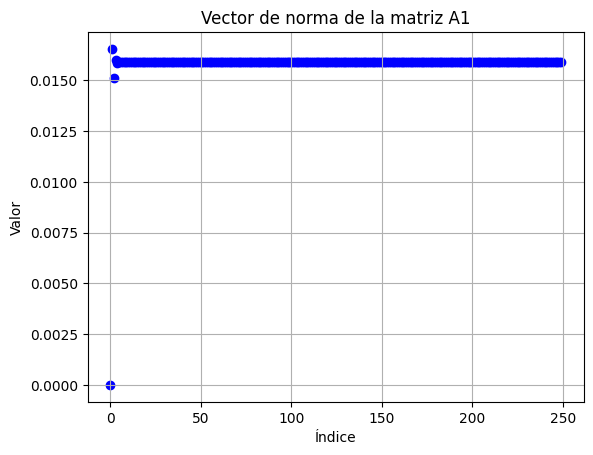

In [7]:
plt.scatter(range(len(vector)), np.log10(vector), color = "blue")
plt.title("Vector de norma de la matriz A1")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.grid()
plt.show()
# Tomamos las sugerencias, pero el gráfico no mejora o no cambia significativamente para interpretarlo mejor

Ahora veamos el vector de norma de la matriz A2

In [8]:
vector2 = norma(A2, 250)
vector2_decimal = [f"{coord:.6f}" for coord in vector2]
vector2_decimal[::10]

['1.000000',
 '0.494959',
 '0.233571',
 '0.110222',
 '0.052013',
 '0.024545',
 '0.011583',
 '0.005466',
 '0.002579',
 '0.001217',
 '0.000574',
 '0.000271',
 '0.000128',
 '0.000060',
 '0.000028',
 '0.000013',
 '0.000006',
 '0.000003',
 '0.000001',
 '0.000001',
 '0.000000',
 '0.000000',
 '0.000000',
 '0.000000',
 '0.000000']

Cada 10 coordenadas, se puede observar como la norma se acerca a una asíntota en el 0.

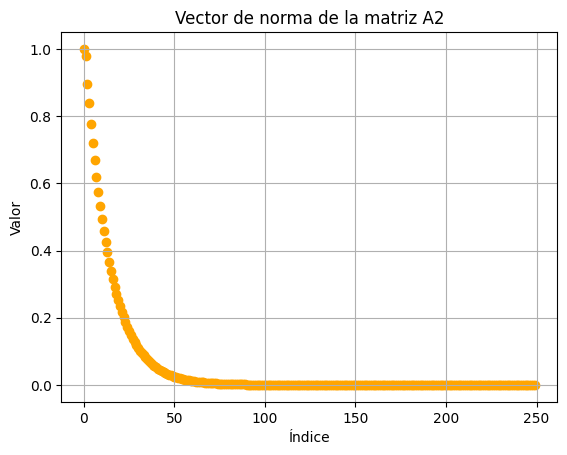

In [9]:
plt.scatter(range(len(vector2)), vector2, color = "orange")
plt.title("Vector de norma de la matriz A2")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.grid()
plt.show()
# Dejamos ambos gráficos porque consideramos que se observa mejor la convergencia en el primero

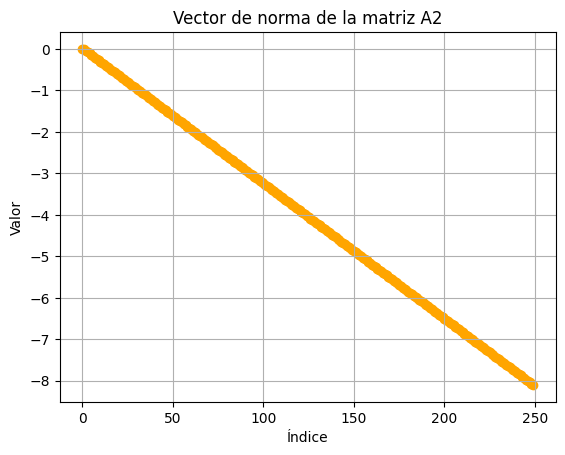

In [10]:
plt.scatter(range(len(vector2)), np.log10(vector2), color = "orange")
plt.title("Vector de norma de la matriz A2")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.grid()
plt.show()

## Ejercicio 3

In [11]:
from funciones import *

Implementamos dos funciones: MetodoPotencia y MonteCarlo.

La primera, realiza el cálculo del coeficiente de Rayleigh para un vector random. Esto nos da la mejor aproximación al autovalor de mayor módulo, que es uno de los datos que queremos hallar.

La función MonteCarlo, nos permite realizar el proceso 250 veces y que el cálculo sea estadístico. Finalmente el autovalor que buscamos será el promedio entre todos los que encontramos para las 250 iteraciones.

También exhibimos el desvío estándar, y tiene sentido que resulte ser 0 pues es una medida de cuán lejos la magnitud está del promedio y nuestro valor final es un promedio de los autovalores.

In [14]:
#rk1, autovaloresA1, vA1, promedioA1, desvioA1 =
desvioA1, promedioA1 = MonteCarlo(A1)
print("Autovalor promedio de A1:", promedioA1, "\nDesvío A1:", desvioA1)
#rk2, autovaloresA2, vA2, promedioA2, desvioA2 = MonteCarlo(A2)
desvioA2, promedioA2 = MonteCarlo(A2)
print("Autovalor promedio de A2:", promedioA2, "\nDesvío A2:", desvioA2)

Autovalor promedio de A1: 1.000000000158923 
Desvío A1: 0.0
Autovalor promedio de A2: 0.9276514475785965 
Desvío A2: 0.0


## Ejercicio 4 a)

$(I - A)^{-1} = I + A¹ + A² + A³ + ... + A^n$

In [20]:
def serie_potencias(A, k):
  suma = np.eye(len(A))
  if k == 0:
    return suma
  for i in range(k+1):
      suma += potencia(A,i)
  return suma

In [40]:
A1_10 = np.linalg.norm((serie_potencias(A1, 10)), 2)

In [42]:
A2_10 = np.linalg.norm((serie_potencias(A2, 10)), 2)

In [43]:
A1_100 = np.linalg.norm((serie_potencias(A1, 100)), 2)

In [44]:
A2_100 = np.linalg.norm((serie_potencias(A2, 100)), 2)

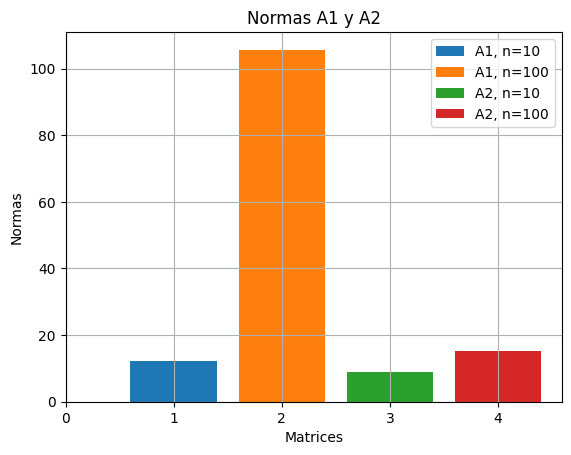

In [45]:
plt.bar(1,A1_10, label='A1, n=10')
plt.bar(2,A1_100, label='A1, n=100')
plt.bar(3,A2_10, label='A2, n=10')
plt.bar(4,A2_100, label='A2, n=100')
plt.title("Normas A1 y A2")
plt.xlabel("Matrices")
plt.ylabel("Normas")
plt.xticks(np.arange(5))
plt.legend()
plt.grid()
plt.show()

## Ejercicio 4 b)

Consideramos que la matriz A1 en principio no converge puesto a que calculando la norma con distintos valores de n mayores a 100, este aumentaba considerablemente en cada paso. Sabemos que n = 100 no es un valor suficientemente grande para indentificar convergencia pero entendemos que para un n mucho mas grande eventualmente converge.

En cambio para la matriz A2, observamos que a partir de un cierto n la norma de la misma casi no cambia, es decir que converge a un cierto valor. En este caso los numeros cercanos al 100 tienen normas similares por lo que ya con este n podemos ver que converge.



## Ejercicio 4 c)

Por el ejercicio 1 sabemos que $\lim_{n \to ∞}(A^{n+1})=0 \Rightarrow (I − A)^{−1} = I + A + A^2 + A^3 + . . . + A^n + . . . $

Esta es la regla que asegura la convergencia de la serie infinita debido a que a partir de cierto valor de n, $A^n$ tiende a 0 por lo que el valor de su norma tiende a ser el mismo que para las matrices anteriores.

## Ejercicio 4 d)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
L, U, P = calcularLU(A2)
inversa = inversaLU(L,U,P)
resta = serie_potencias(A2, 0) - inversa

In [46]:
np.linalg.norm(resta, 2)

34.72059342611411

In [22]:
def error(A, k):
  e = []
  L, U, P = calcularLU(A)
  inversa = inversaLU(L,U,P)
  for i in range(k):
    resta = serie_potencias(A, i) - inversa
    e = np.append(e, (np.linalg.norm(resta, 2)))
  return e

In [23]:
er = error(A2, 100)

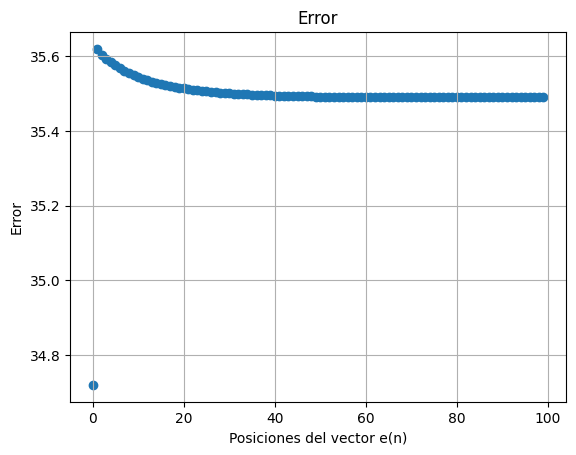

In [24]:
plt.scatter(np.arange(len(er)), er)
plt.title("Error")
plt.xlabel("Posiciones del vector e(n)")
plt.ylabel("Error")
plt.grid()
plt.show()

## Ejercicio 5

In [25]:
matriz = pd.read_excel("/content/drive/MyDrive/alc/matrizlatina2011_compressed_0.xlsx", "LAC_IOT_2011")

In [26]:
filasuh = matriz[(matriz["Country_iso3"] == "URY") | (matriz["Country_iso3"] == "HND")]

Zgenerica = filasuh[[col for col in filasuh.columns if col[:3]=="HND" or col[:3]== "URY" or col=="Output"]]
Zgenerica

,URYs1,URYs2,URYs3,URYs4,URYs5,URYs6,URYs7,URYs8,URYs9,URYs10,...,HNDs32,HNDs33,HNDs34,HNDs35,HNDs36,HNDs37,HNDs38,HNDs39,HNDs40,Output
320,486.067204,0.0,0.0,3.755586e-02,1.825140e+03,411.655291,5.395932e+00,853.014767,89.621480,1.296646e+01,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7162.152659
321,0.000000,0.0,0.0,0.000000e+00,1.074056e-03,0.000176,3.000000e-09,81.137823,0.000000,0.000000e+00,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.356628
322,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
323,0.000000,0.0,0.0,1.462455e+01,6.009839e-01,0.496378,4.194290e-02,0.276108,1.008360,1.458897e-01,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,356.350622
324,0.000000,0.0,0.0,0.000000e+00,1.527977e+02,43.620512,1.740193e-01,15.841509,0.000000,0.000000e+00,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3136.101515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.000037,0.0,0.0,5.010000e-07,1.330100e-05,0.000050,1.380000e-06,0.000014,0.000009,1.291000e-06,...,0.0,2.649743,12.326201,18.620325,23.362732,7.437450,7.658895,2.751644,92.758600,1339.280794
556,0.000000,0.0,0.0,0.000000e+00,9.120400e-05,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.0,0.963740,1.014234,1.396444,20.384268,152.695989,28.581332,5.049501,107.962132,1072.083390
557,0.000000,0.0,0.0,0.000000e+00,3.380000e-07,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.0,2.642135,14.830566,12.494599,15.651193,19.860812,227.233277,15.026026,125.462728,1845.478262
558,0.000000,0.0,0.0,3.431530e-04,2.300000e-07,0.000127,1.312069e-03,0.003952,0.000089,1.286100e-05,...,0.0,3.939286,26.076691,1.037599,9.339317,41.241612,67.793374,20.867091,224.792542,1647.550113


In [27]:
p = Zgenerica["Output"]
p = p.to_numpy().reshape(-1,1)

Z7 = Zgenerica.drop("Output", axis = 1)
flujo = Z7.to_numpy()
flujo

def ceros_a_unos(p):
  for i in range(0,len(p)):
    if p[i] == 0:
      p[i] = 1
  return p

In [28]:
p = ceros_a_unos(p)

In [29]:
uh = flujo[:40,40:] #matriz con ury como fil y hnd como col
hu = flujo[40:,:40] #matriz con hnd como fil y ury como col
hh = flujo[40:,40:] #matriz con hnd como fil y hnd como col
uu = flujo[:40,:40] #matriz con ury como fil y ury como col

In [30]:
# Armamos la matriz P para HND
ph = p[40:]
PH = ph.T*np.eye(ph.size)
Lh, Uh, Ph = calcularLU(PH)
invPH = inversaLU(Lh, Uh, Ph)

# Armamos la matriz P para URY
pu = p[:40]
PU = pu.T*np.eye(pu.size)
Lu, Uu, Pu = calcularLU(PU)
invPU = inversaLU(Lu, Uu, Pu)

In [31]:
Auu = uu@invPU
Ahh = hh@invPH

In [34]:
desvioAuu, promedioAuu = MonteCarlo(Auu)
print("Mayor autovalor de la matriz Auu:", promedioAuu.round(3))

Mayor autovalor de la matriz Auu: 0.319


In [37]:
desvioAhh, promedioAhh= MonteCarlo(Ahh)
print("Mayor autovalor de la matriz Ahh:", promedioAhh.round(3))

Mayor autovalor de la matriz Ahh: 0.56


In [38]:
Auu_10 = np.linalg.norm(serie_potencias(Auu,10), 2)
print(Auu_10)
Auu_100 = np.linalg.norm(serie_potencias(Auu,100), 2)
print(Auu_100)

2.7623198134368034
2.7623270689876103


In [39]:
Ahh_10 = np.linalg.norm(serie_potencias(Ahh,10), 2)
print(Ahh_10)
Ahh_100 = np.linalg.norm(serie_potencias(Ahh,100), 2)
print(Ahh_100)

3.2811663019619033
3.2850441968176716


Podemos decir que existe convergencia ya que como $\lim_{n \to ∞}(A^{n+1})=0$ con n suficientemente grande, no cambia seguir sumando matrices elevadas a números más grandes. Esto ocurre para todas las matrices puesto a que en el ejercicio 1 probamos la ida para una matriz A genérica.

## Ejercicio 6 a)

$En = In −(1/n)e e^t$ y $z \in R^n $

\begin{equation}
En =
\begin{pmatrix}
1 &\cdots & 0 \\
\vdots & \ddots & \vdots \\
0 & \cdots & 1
\end{pmatrix}
-
\begin{pmatrix}
1/n &\cdots & 1/n \\
\vdots & \ddots & \vdots \\
1/n & \cdots & 1/n
\end{pmatrix}
=
\begin{pmatrix}
1-1/n &\cdots & -1/n \\
\vdots & \ddots & \vdots \\
-1/n & \cdots & 1-1/n
\end{pmatrix}
\end{equation}

\begin{equation}
z =
\begin{pmatrix}
z_1 \\
\vdots \\
z_n
\end{pmatrix}
\end{equation}

Multiplicando $En@z$ , cada fila queda:

$(1-1/n)z_1 - (1/n)z_2 - ... - (1/n)z_n = (1-1/n)z_1 - \sum_{i=2}^{n} \left((1/n)z_i \right) = z_1 - \sum_{i=1}^{n} \left((1/n)z_i \right)$

$(-1/n)z_1 - (1-1/n)z_2 - ... - (1/n)z_n = z_2 - \sum_{i=1}^{n} \left((1/n)z_i \right)$

$\vdots$

$(-1/n)z_1 - (1/n)z_2 - ... - (1-1/n)z_n = z_n - \sum_{i=1}^{n} \left((1/n)z_i \right)$

Entonces
\begin{equation}
En@z =
\begin{pmatrix}
z_1 - \sum_{i=1}^{n} \left((1/n)z_i \right) \\
\vdots \\
z_n - \sum_{i=1}^{n} \left((1/n)z_i \right)
\end{pmatrix}
\end{equation}

Sumando las filas:

$\sum_{i=1}^{n} \left(z_i \right) - n\sum_{i=1}^{n} \left((1/n)z_i \right) =$

$\sum_{i=1}^{n} \left(z_i \right) - n(1/n)\sum_{i=1}^{n} \left(z_i \right) =$

$\require{cancel} \sum_{i=1}^{n} \left(z_i \right) - \cancel{n(1/n)} \sum_{i=1}^{n} \left(z_i \right) =$

$\sum_{i=1}^{n} \left(z_i \right) - \sum_{i=1}^{n} \left(z_i \right) = 0$

Luego, el promedio de las componente del vector $Enz$ es 0 para todo $z \in R^n$ como queriamos probar.

$EnA$ centra los datos en el sentido de hacer que cada fila o columna de 𝐴 tenga una suma total de cero. Es decir que normaliza los datos de la matriz.

## Ejercicio 6 b)

Cálculo analítico de autovectores y autovalores de En:

En principio, notamos que $E_n*e = \lambda*e = 0*e$, por lo tanto, e es un autovector de En, de autovalor $\lambda = 0$.

Ahora, consideremos un vector v, tal que v es ortogonal a e, es decir, $v^te=0$
Desarrollamos entonces, $E_n*v = (In − \frac{1}{n} ee^t)v = v - \frac{1}{n}ee^tv$ , y recordando que $v^te=0$, tenemos que: $E_nv = v$. Luego, v es un autovector de
$E_n$ con autovalor 1. Este resultado indica que todos los vectores ortogonales a e son autovectores de $E_n$ con autovalor 1.
Los vectores que no son ortogonales se pueden pensar como combinación lineal de e y los vectores ortogonales a e.

Utilizando la sugerencia, podriamos decir que la dimensión del núcleo de $E_n$ es 1, ya que encontramos el vector que cumple $Av = 0$, y es e. Luego, la dimensión de la Imagen de $E_n$ es n-1, y los vectores que generan la imagen, son los autovectores de $E_n$ que son ortogonales a e.

Entonces:
$dim(Nu(E_n)) = 1$ porque el nucleo está generado por el vector e

$dim(Im) = n-1$ porque la imagen está generada por los vectores {d2, . . . , dn}

## Ejercicio 6 c)

Para probar que $E_n$ es una proyección ortogonal, primero tenemos que probar que $E_n$ es un proyector:
Para esto, debe cumplir $E_n^2 = E_n$

$(In − \frac{1}{n} ee^t)(In − \frac{1}{n} ee^t) = In -\frac{1}{n}ee^t -\frac{1}{n}ee^t + \frac{1}{n^2}ee^tee^t$ Agrupamos $e^te$:  
$In -2\frac{1}{n}ee^t + \frac{1}{n^2}e(e^te)e^t$
Luego, sabemos que $e^te = n$ porque e es un vector columna de todos 1. Entonces,
$In -2\frac{1}{n}ee^t + \frac{1}{n^2}ene^t = In -2\frac{1}{n}ee^t + \frac{1}{n}ee^t = In − \frac{1}{n} ee^t$

Y acá probamos que $E_n$ es un proyector.

Por otro lado, sabemos que es ortogonal, porque anteriormente mostramos que el núcleo de $E_n$ es el subespacio generado por e, y como es de dimensión 1 es el único, y los demás vectores que forman la imagen de $E_n$, son ortogonales a e, entonces el núcleo y la imagen son ortogonales.

Esta matriz 𝐸n es una matriz que proyecta cualquier vector en el subespacio ortogonal al vector e. Como sabemos que todo vector en $R^n$ se puede escribir como una combinacion lineal entre e y los vectores ortogonales a e, al multiplicar 𝐴 por 𝐸n, se está eliminando cualquier componente en la dirección de e. Es decir que proyecta sobre el subespacio formado por los vectores ortogonales a e, {d1, ..., dn}.

## Ejercicio 6 d)
i) **Falso**. Para saber si es ortogonal, $E_n$ tendría que cumplir $E_n^tE_n = In$

$E_n^t = (In − \frac{1}{n} ee^t)^t = In − \frac{1}{n}ee^t = E_n$, vemos que $E_n$ es una matriz simétrica. Entonces $E_n^2 = E_n^tE_n = E_n$ que sabemos que es distinta a $In$. Por lo tanto, no es ortogonal.

ii) **Verdadero**. Podemos decir que es singular porque uno de sus autovalores es 0.

iii) **Falso**. Para ver que $E_n$ sea definida positiva, tendría que cumplir $x^tE_nx > 0, x\neq 0$. Si tomamos v = e (que sabemos que es distinto de 0) y agrupamos la multiplicación, $e^t(E_ne)$, sabiendo que $E_ne = 0$, vemos que el producto es igual a 0, por ende no es definida positiva.

iv) **Verdadero**. $traza(E_n) = n-1$. Vimos que la traza de una matriz es la suma de los elementos de la diagonal, entonces planteamos:
$\sum_{i=1}^{n} \left( 1 - \frac{1}{n} \right) = n(1 - \frac{1}{n}) = n - 1$

(es n veces lo de adentro de la sumatoria). Esto es porque la matriz $E_n$ tiene en la diagonal $1 - \frac{1}{n}$ en todas sus posiciones.

## Ejercicio 7

$C = Arr^t Arr/ (40 − 1)$ Matriz de covarianza

$C′ = C − λ_1v_1v_1^t$

In [48]:
e40 = np.ones(40)
E40 = np.eye(40) - (1/40)*(np.outer(e40, e40))
# Normalizamos e40
Hon = E40@Ahh
# Matriz normalizada para Honduras
C = Hon.T@Hon / (40-1)
# Matriz de covarianza de Honduras
x0 = np.arange(40)
x0 = x0.reshape(-1,1)
x0 = x0 / np.linalg.norm(x0,2)
# Inicializamos un vector y lo normalizamos para realizar el algoritmo de Deflación de Hotelling

In [ ]:
# Siguiendo el algoritmo, cada vez que actualizamos el vector lo normalizamos antes de reutilizarlo
x1 = C@x0
x1 = x1 / np.linalg.norm(x1,2)
lambda1 = (x1.T @ C @ x1)/(x1.T@x1)
# Calculamos el primer autovalor
C2 = C - lambda1*(np.outer(x1,x1))
# Actualización de la matriz de Covarianza
x2 = C2 @ x1
x2 = x2 / np.linalg.norm(x2,2)
lambda2 = (x2.T @ C2 @ x2)/(x2.T@x2)
# Calculamos el segundo autovalor
print("Autovalor 1:", lambda1, "\nAutovalor 2:", lambda2)
#print("Autovector 1:", x1, "\nAutovalor 1:", lambda1, "\nAutovector 2:", x2, "\nAutovalor 2:", lambda2)

Autovector 1: [[0.077]
 [0.027]
 [0.   ]
 [0.132]
 [0.212]
 [0.083]
 [0.223]
 [0.418]
 [0.095]
 [0.084]
 [0.27 ]
 [0.074]
 [0.204]
 [0.061]
 [0.148]
 [0.   ]
 [0.19 ]
 [0.105]
 [0.214]
 [0.095]
 [0.265]
 [0.   ]
 [0.457]
 [0.042]
 [0.085]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.153]
 [0.128]
 [0.156]
 [0.113]
 [0.187]
 [0.132]
 [0.062]
 [0.121]] 
Autovalor 1: [[0.008]] 
Autovector 2: [[-0.017]
 [-0.035]
 [ 0.   ]
 [-0.123]
 [ 0.425]
 [ 0.002]
 [ 0.371]
 [ 0.571]
 [-0.089]
 [ 0.093]
 [-0.036]
 [-0.044]
 [-0.168]
 [-0.059]
 [-0.141]
 [ 0.   ]
 [-0.171]
 [-0.094]
 [-0.186]
 [-0.06 ]
 [-0.22 ]
 [ 0.   ]
 [-0.062]
 [-0.045]
 [-0.076]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [-0.133]
 [-0.11 ]
 [-0.128]
 [-0.101]
 [-0.196]
 [-0.144]
 [-0.06 ]
 [-0.106]] 
Autovalor 2: [[0.012]]


## Ejercicio 8

In [50]:
V = np.column_stack((x1, x2))
V.shape

(40, 2)

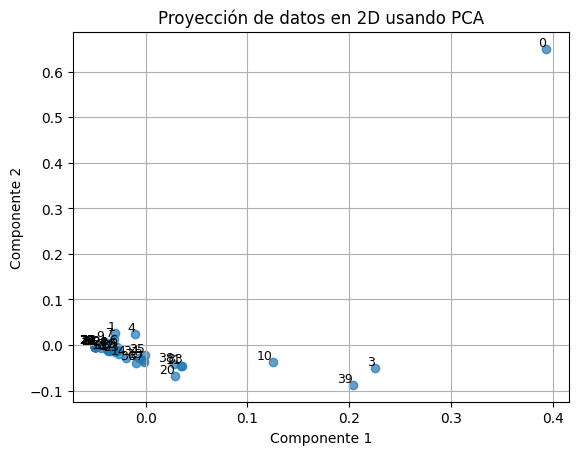

In [51]:
# Analisis para Honduras

proyeccionesH = Hon @ V

for i, (x, y) in enumerate(proyeccionesH):
    plt.text(x, y, str(i), fontsize=9, ha='right', va='bottom')
plt.scatter(proyeccionesH[:, 0], proyeccionesH[:, 1], alpha=0.7)
plt.title('Proyección de datos en 2D usando PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

Reducimos la escala para identificar mejor algunos clusters

In [52]:
df = pd.DataFrame(proyeccionesH)
df = df.rename(columns = {"0" : "Componente 1"})

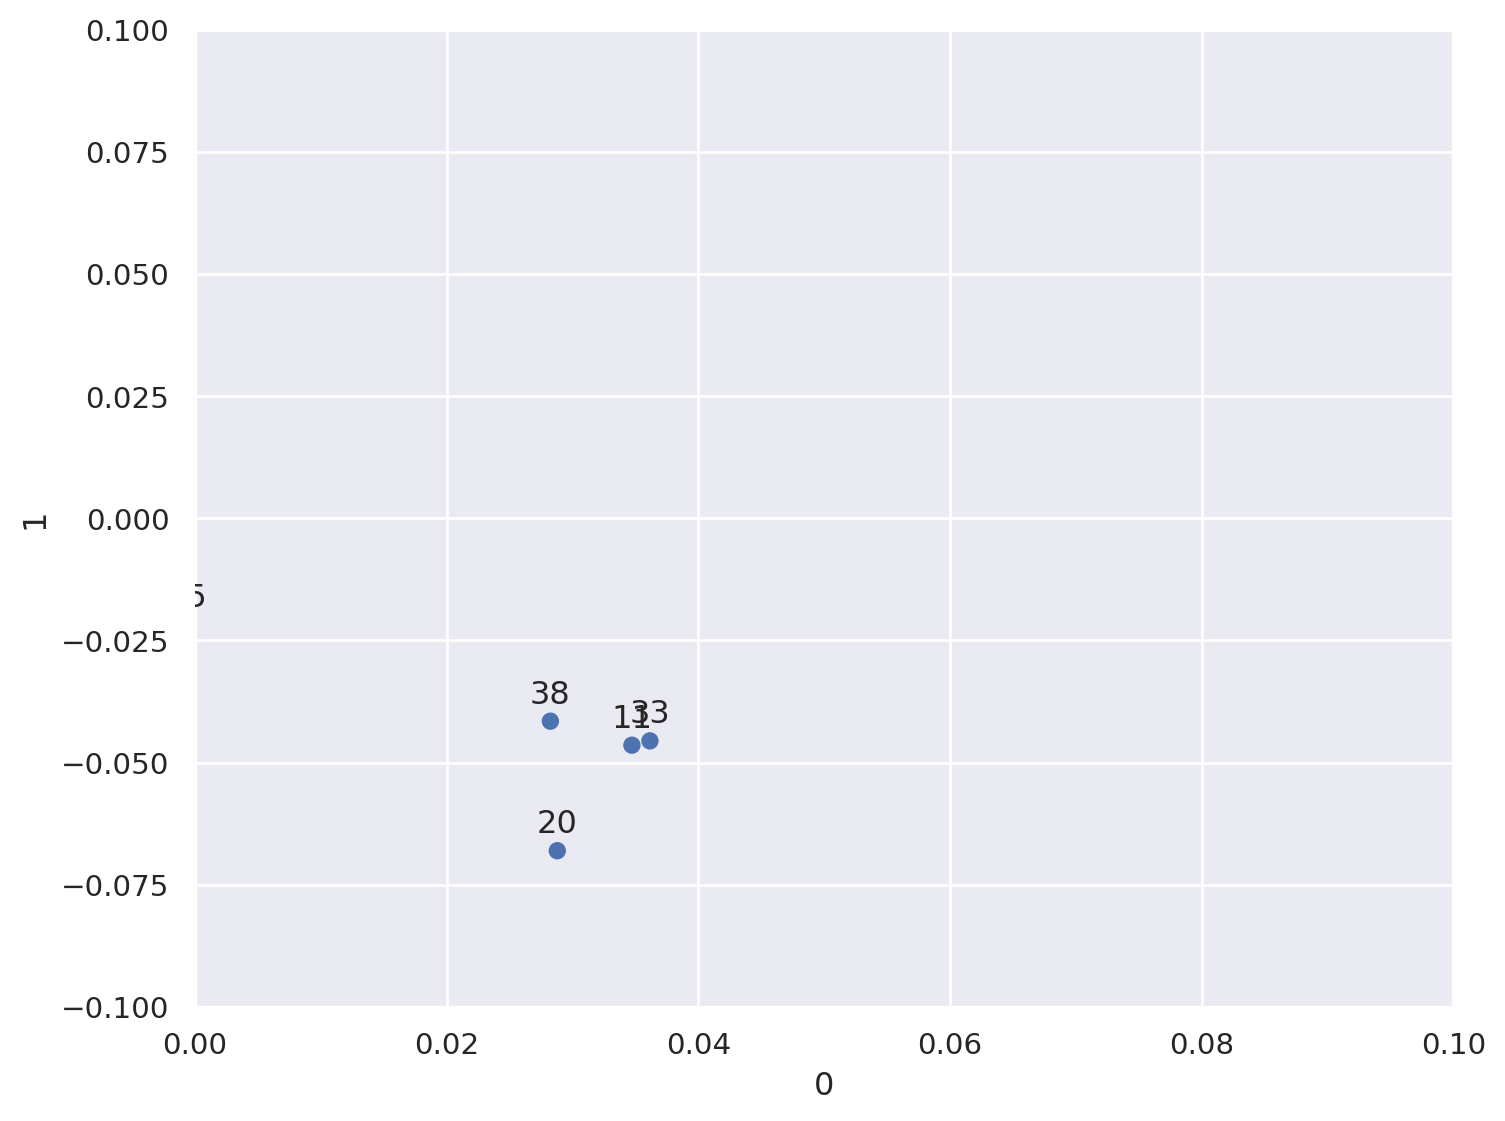

In [53]:
(
    so.Plot(data = df, x = df[0], y =df[1], text = df.index)
    .add(so.Dot())
    .add(so.Text(valign="bottom"))
    .limit(x=(0, 0.1), y=(-0.1,0.1))
    .layout(size=(8, 6))
)

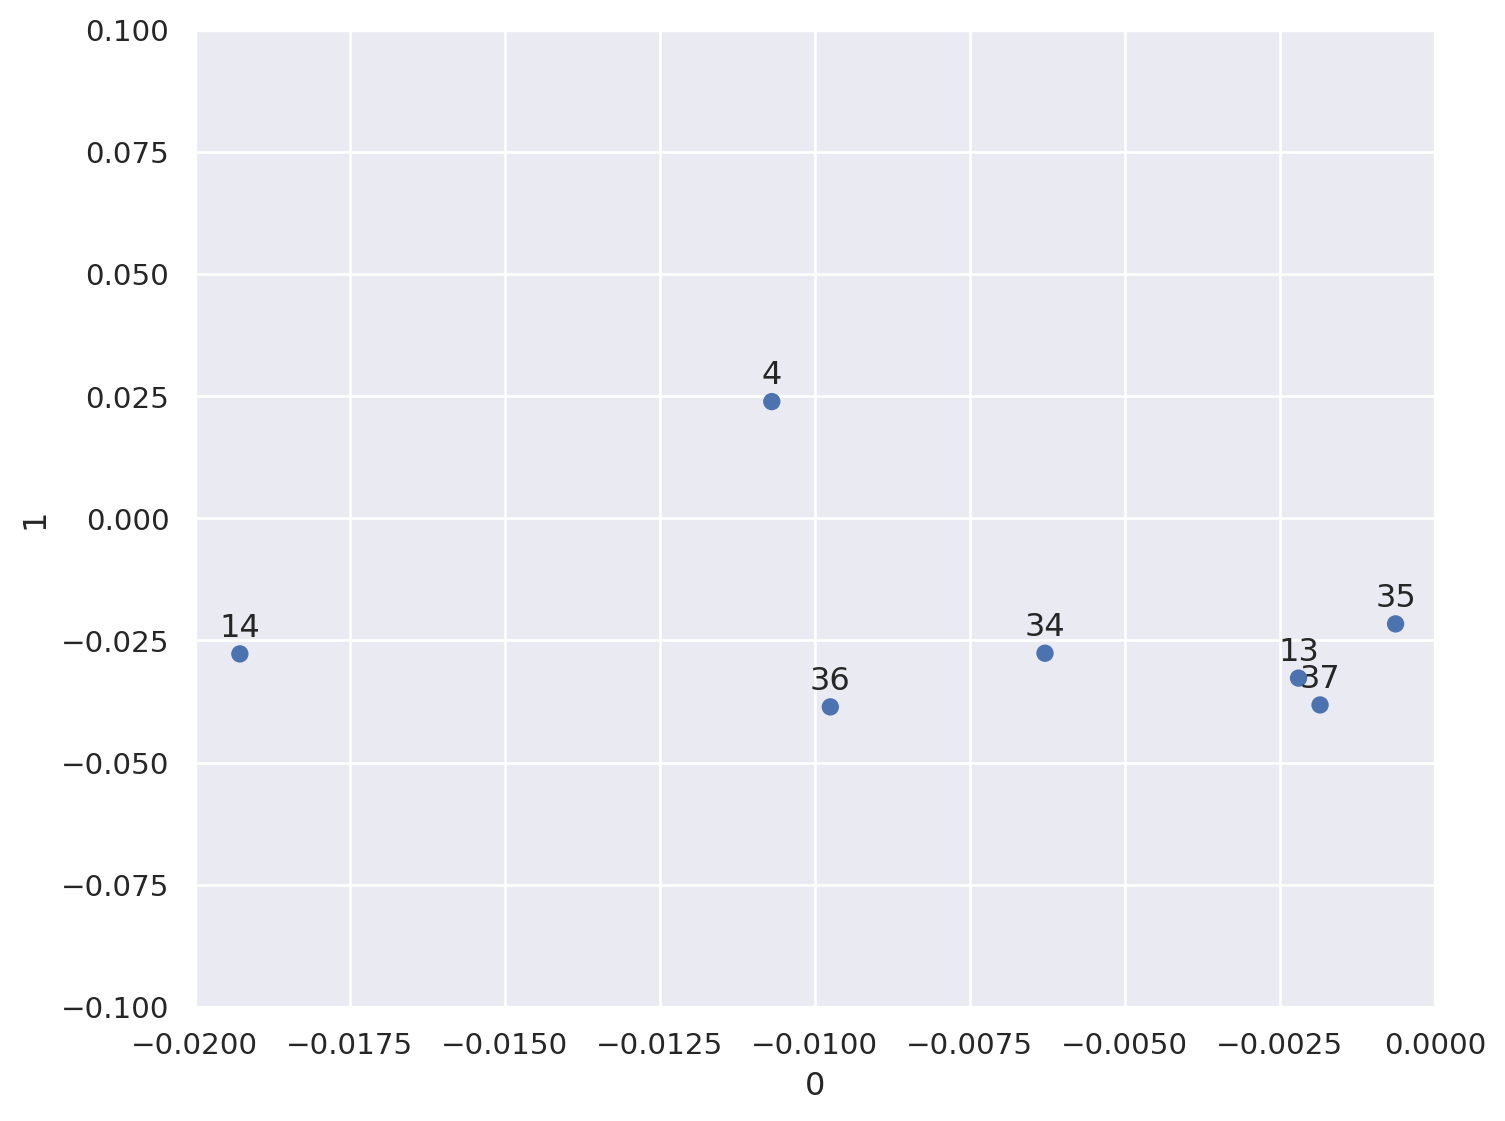

In [54]:
(
    so.Plot(data = df, x = df[0], y =df[1], text = df.index)
    .add(so.Dot())
    .add(so.Text(valign="bottom"))
    .limit(x=(-0.02, 0), y=(-0.1,0.1))
    .layout(size=(8, 6))
)

Analisis para Honduras:

Como empieza a enumerar desde el 0, y los sectores empiezan desde el número 1, entonces tomamos el sector i+1 para cada punto i que observamos.
Notamos a simple vista que en principio hay 2 clusters.

*   Por un lado tenemos los sectores 11 (es decir, sector 12, ropa formal),33 (es decir, 34, electricidad y gas),38 (39, servicios de negocios de todo tipo) y 20 (otros productos minerales no metálicos) que forman un cluster. Podríamos hacer la siguiente relación entre sectores: Los sectores de ropa
formal, electricidad y gas, servicios de negocios y productos minerales no metálicos están interconectados a través de sus necesidades comunes de infraestructura, energía y materiales. La producción de ropa formal depende de la electricidad y el gas para su fabricación, mientras que las empresas de estos sectores recurren a servicios de negocios para optimizar sus operaciones. Además, el sector de productos minerales no metálicos provee materiales clave, como vidrio o cerámica, que pueden utilizarse en la maquinaria de producción textil o en la infraestructura energética, favoreciendo un enfoque más sostenible en toda la cadena de valor.

*   Por otro lado tenemos los sectores 13 (es decir, el 14, productos de madera y corcho), 35 (es decir, 36, transporte), 37 (es decir, 38, finanzas y seguros).
Esto tiene sentido ya que los sectores de productos de madera y corcho, transporte, y finanzas y seguros están estrechamente vinculados en la cadena de suministro y el ciclo económico. El sector de madera y corcho provee materiales que requieren transporte para su distribución, mientras que las finanzas y seguros facilitan tanto el financiamiento de la producción como la gestión de riesgos asociados al transporte y la comercialización de estos productos.

## Ejercicio 9

Tenemos nuestra matriz H: $H = A(I − A)^{−1}$

Luego por el ejercicio 1 sabemos que $(I − A)^{−1} = (I + A + A^2 + A^3 + . . . + A^n + . . . )$

Entonces tenemos:

$H = A(I + A + A^2 + A^3 + . . . + A^n + . . . )$

$H = A + A^2 + A^3 + A^4 +. . . + A^{n+1} + . . . $

Finalmente, la relacion entre H y la suma de potencias es: $H + I = I + A + A^2 + A^3 + . . . + A^n + . . .  = I + \sum_{i=1}^{∞} \left(A^i \right)$

## Ejercicio 10


In [55]:
B = (np.eye(len(Auu))-Auu) #(I-A)

L_B, U_B, P_B = calcularLU(B)
Leo = inversaLU(L_B, U_B, P_B) #(INVERSA DE I-A)

H = Auu@Leo

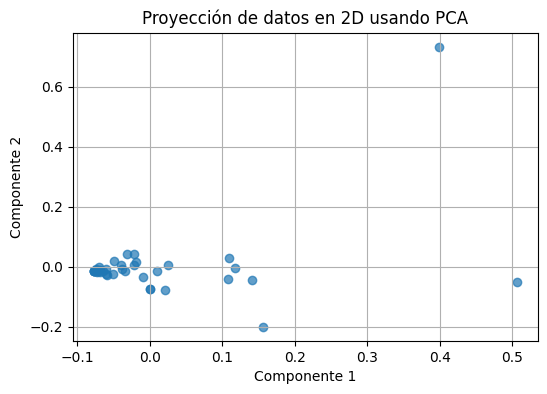

In [56]:
# Analisis para Auu (Uruguay)
Huru = (E40@H)
C_Huru = Huru.T@Huru / (40-1) #es la matriz de covarianza para la H de Uruguay

y0 = np.arange(40)
y0 = y0.reshape(-1,1)
y0 = y0 / np.linalg.norm(y0,2)

y1 = C_Huru@y0
y1 = y1 / np.linalg.norm(y1,2)
theta1 = (y1.T @ C_Huru @ y1)/(y1.T@y1)
C_H2 = C_Huru - theta1*(np.outer(y1,y1))
y2 = C_H2 @ y1
y2 = y2 / np.linalg.norm(y2,2)
theta2 = (y2.T @ C_H2 @ y2)/(y2.T@y2)

V_Huru = np.column_stack((y1, y2))

proyeccionesU = Huru @ V_Huru
plt.figure(figsize=(6, 4))
plt.scatter(proyeccionesU[:, 0], proyeccionesU[:, 1], alpha=0.7)
plt.title('Proyección de datos en 2D usando PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

In [57]:
df_U = pd.DataFrame(proyeccionesU)

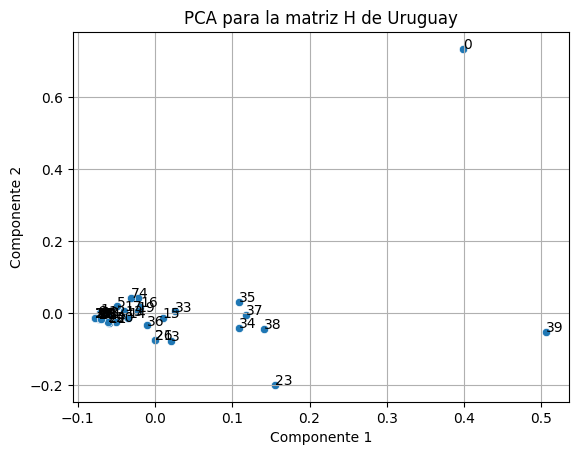

In [58]:
g = sns.scatterplot(data = df_U, x = df_U[0], y =df_U[1]).set_title("PCA para la matriz H de Uruguay")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
for i, txt in enumerate(df_U.index):
    plt.text(df_U[0][i], df_U[1][i], str(txt))
plt.show()

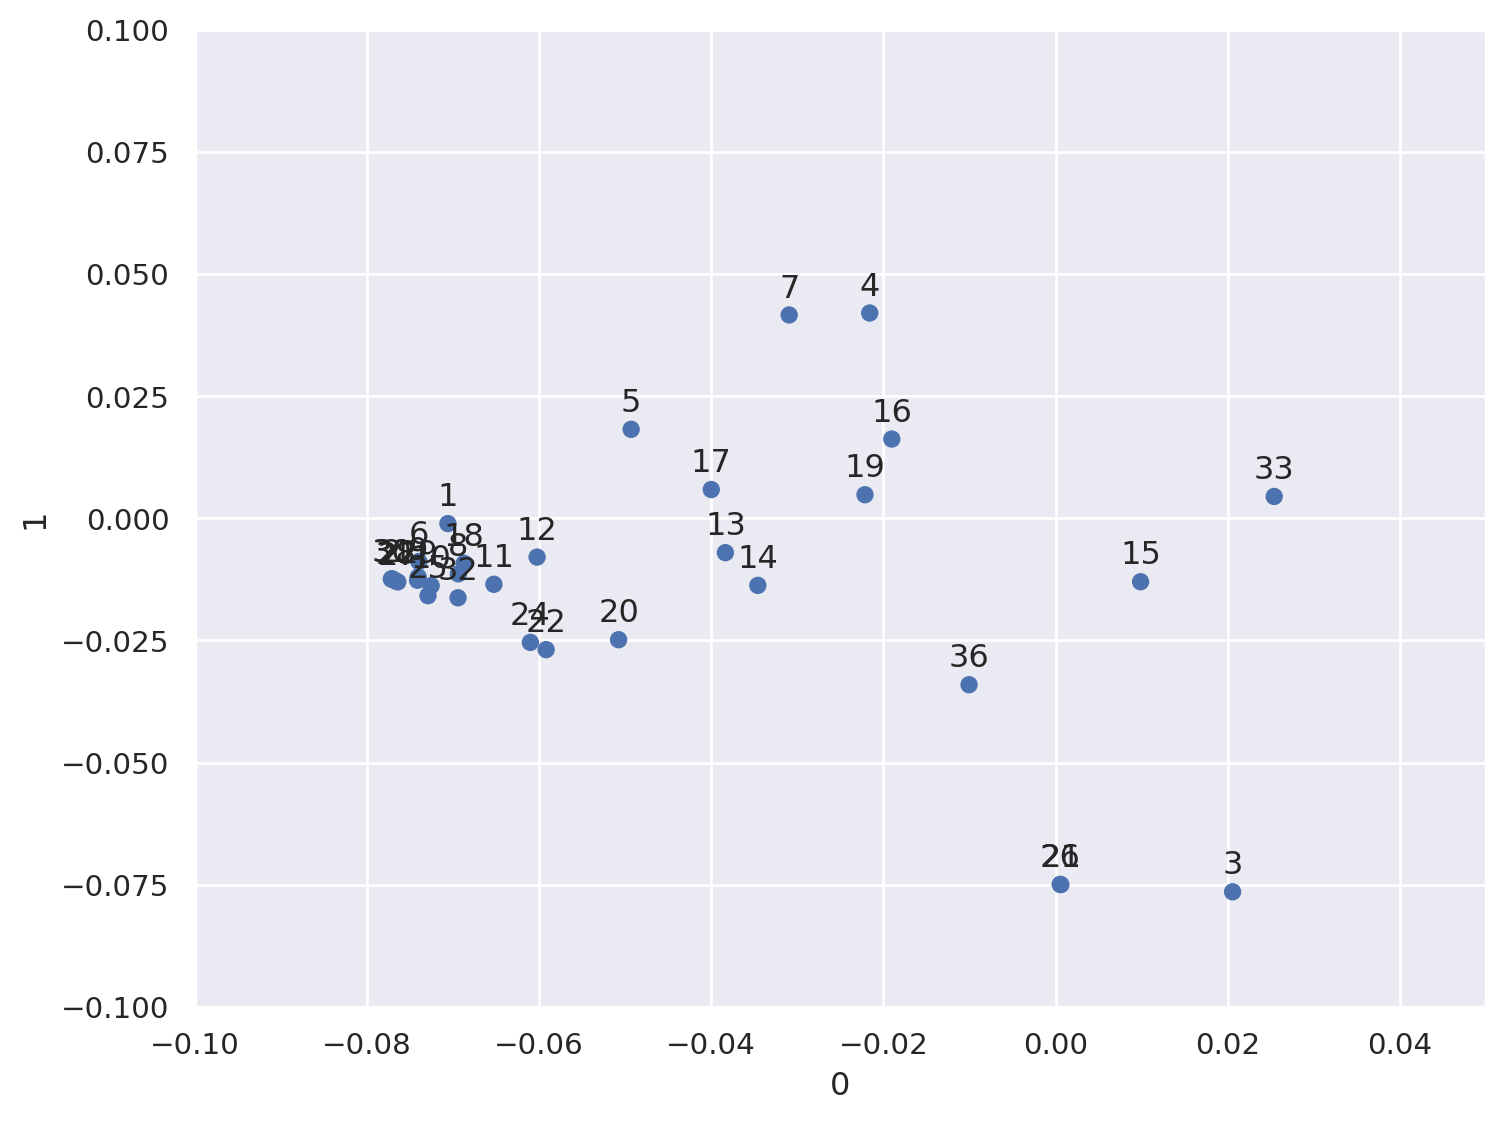

In [59]:
(
    so.Plot(data = df_U, x = df_U[0], y =df_U[1], text = df_U.index)
    .add(so.Dot())
    .add(so.Text(valign="bottom"))
    .limit(x=(-0.10, 0.05), y=(-0.1,0.1))
    .layout(size=(8, 6))
)

Nuevamente, como empieza a enumerar desde el 0, y los sectores empiezan desde el número 1, entonces tomamos el sector i+1 para cada punto i que observamos.

Identificamos en principio 2 clusters
*   1ro: 34, 35, 37 y 38 (del primer gráfico)
*   2do: elegimos los sectores 13, 14, 17 (del segundo gráfico)

Del primer cluster vemos que están los sectores de construcción, transporte, finanzas y seguros, servicios de negocios de todo tipo.


Por otro lado, el segundo cluster vemos incluye a los sectores productos de madera y corcho, producción, impresión y publicación de papel, otros productos químicos excluyendo farmacéuticos.

Si bien podríamos especular acerca de las relaciones entre los sectores, se requiere un análisis más profundo para ser más contundentes y confiables en nuestras conclusiones.


Ahora repetimos el mismo procedimiento para la H de Honduras

In [60]:
BH = (np.eye(len(Ahh))-Ahh) #(I-A)
L_BH, U_BH, P_BH = calcularLU(BH)
LeoH = inversaLU(L_BH, U_BH, P_BH) #(INVERSA DE I-A)

HH = Ahh@LeoH

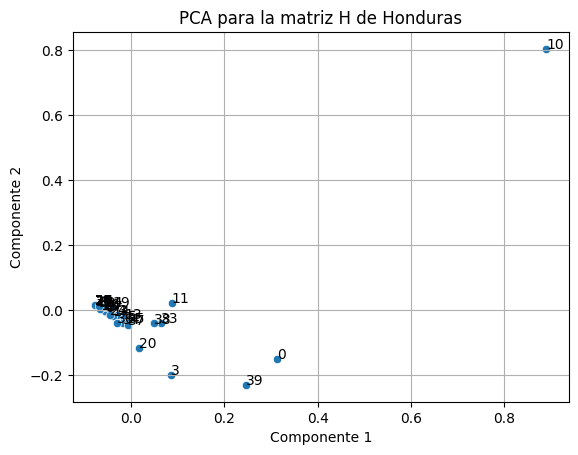

In [61]:
# Analisis para Honduras
Hhon = (E40@HH)
C_Hhon = Hhon.T@Hhon / (40-1) #es la matriz de covarianza para la H de Honduras

yH0 = np.arange(40)
yH0 = yH0.reshape(-1,1)
yH0 = yH0 / np.linalg.norm(yH0,2)

yH1 = C_Hhon@yH0
yH1 = yH1 / np.linalg.norm(yH1,2)
theta1H = (yH1.T @ C_Hhon @ yH1)/(yH1.T@yH1)
C_HH2 = C_Hhon - theta1H*(np.outer(yH1,yH1))
yH2 = C_HH2 @ yH1
yH2 = yH2 / np.linalg.norm(yH2,2)
theta2H = (yH2.T @ C_HH2 @ yH2)/(yH2.T@yH2)

V_Hhon = np.column_stack((yH1, yH2))

proyeccionesHon = Hhon @ V_Hhon

df_H = pd.DataFrame(proyeccionesHon)
h = sns.scatterplot(data = df_H, x = df_H[0], y =df_H[1]).set_title("PCA para la matriz H de Honduras")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid()
for i, txt in enumerate(df_H.index):
    plt.text(df_H[0][i], df_H[1][i], str(txt))
plt.show()

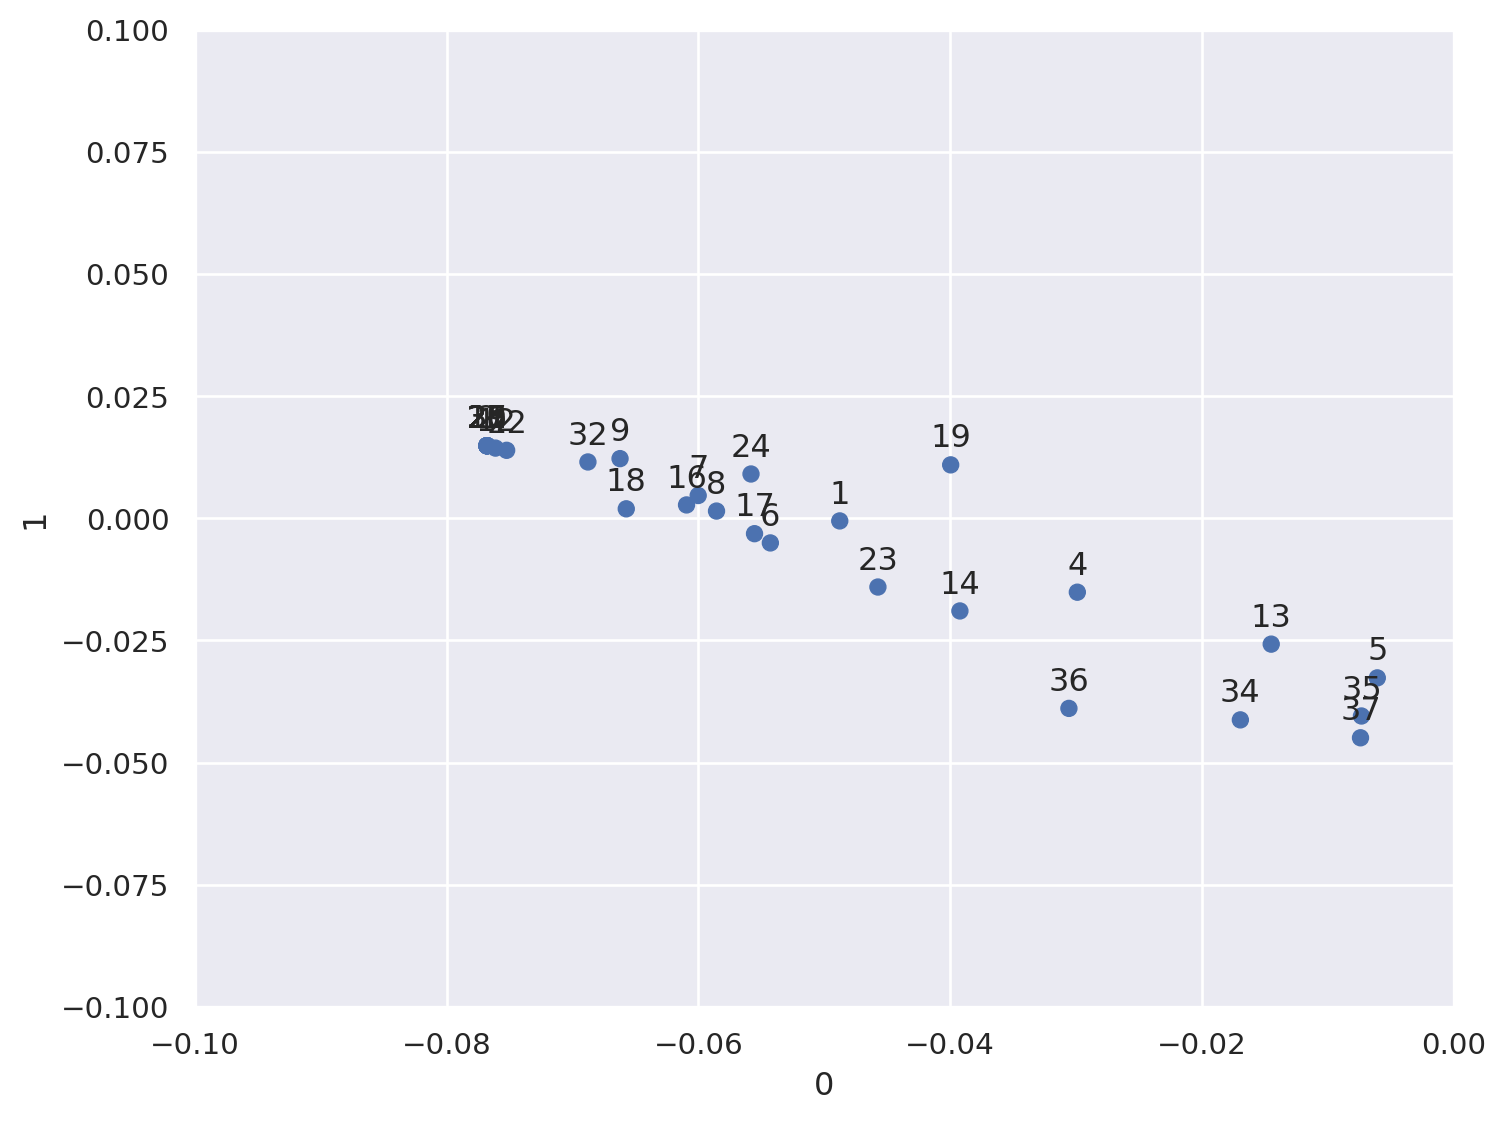

In [62]:
(
    so.Plot(data = df_H, x = df_H[0], y =df_H[1], text = df_H.index)
    .add(so.Dot())
    .add(so.Text(valign="bottom"))
    .limit(x=(-0.10, 0), y=(-0.1,0.1))
    .layout(size=(8, 6))
)

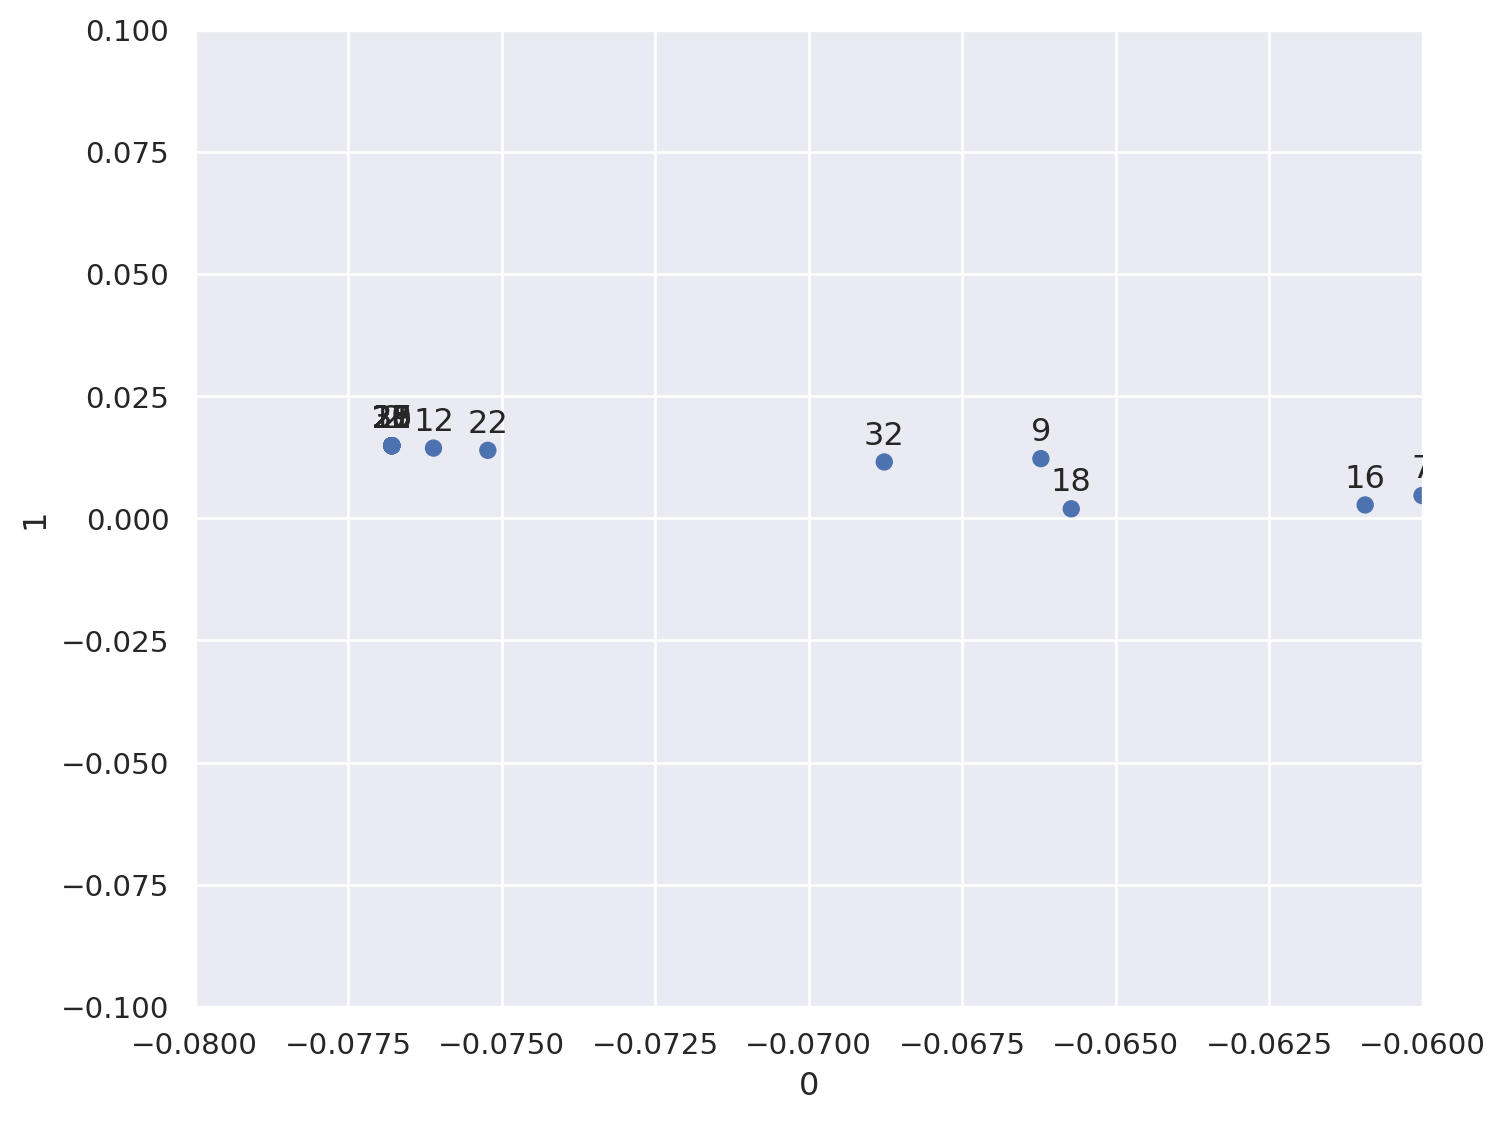

In [63]:
(
    so.Plot(data = df_H, x = df_H[0], y =df_H[1], text = df_H.index)
    .add(so.Dot())
    .add(so.Text(valign="bottom"))
    .limit(x=(-0.08, -0.06), y=(-0.1,0.1))
    .layout(size=(8, 6))
)

Identificamos 2 clusters entre los puntos:

1.   Sectores: 35, 37 y 5
2.   Sectores: 32, 9 y 18

Los sectores del primer cluster son: Transporte, finanzas y seguros, productos de trigo y pastas.

Por otro lado, los sectores del segundo cluster son: reciclaje y varios, tabaco, farmacéuticos.

Si bien podemos encontrar clusters, no podemos asegurar que los datos que tenemos sean lo suficientemente robustos como para establecer relaciones entre los sectores representados. En países más chicos como Honduras, por ejemplo, la cantidad de datos que tenemos puede no ser suficiente como para establecer relaciones claras entre los mismos.



## Ejercicio 11

In [64]:
p_norma = proyeccionesHon.copy()
np.linalg.norm(proyeccionesHon[0,:], 2)

0.34685652265616845

In [65]:
def distAlOrigen(matriz):
  distancias = []
  for i in range(matriz.shape[0]):  # fila
  # Aplicar la norma 2 a cada fila
    distancias.append(np.linalg.norm(matriz[i, :], 2))
  distancias = np.array(distancias)
  return distancias

In [66]:
dist = distAlOrigen(p_norma)

In [67]:
max = dist.max()
min = dist.min()
fila_max = np.argmax(dist)
fila_min = np.argmin(dist)
print("Fila más lejana al origen:", fila_max, "\nFila más cercana al origen:", fila_min)

Fila más lejana al origen: 10 
Fila más cercana al origen: 13


In [68]:
df_h40 = pd.DataFrame(Hhon)

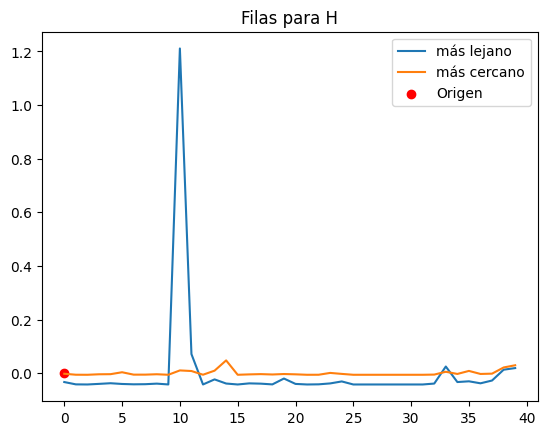

In [69]:
plt.plot(np.arange(40), df_h40[10], label = "más lejano")
plt.plot(np.arange(40), df_h40[13], label = "más cercano")
plt.scatter(0, 0, label="Origen", color = "red")
plt.legend()
plt.title("Filas para H")
plt.show()

In [70]:
distahh = distAlOrigen(proyeccionesH)

In [71]:
df_ahh = pd.DataFrame(Hon)

In [72]:
maxA = distahh.max()
minA = distahh.min()
fila_maxA = np.argmax(distahh)
fila_minA = np.argmin(distahh)
print("Fila más lejana al origen:", fila_maxA, "\nFila más cercana al origen:", fila_minA)

Fila más lejana al origen: 0 
Fila más cercana al origen: 35


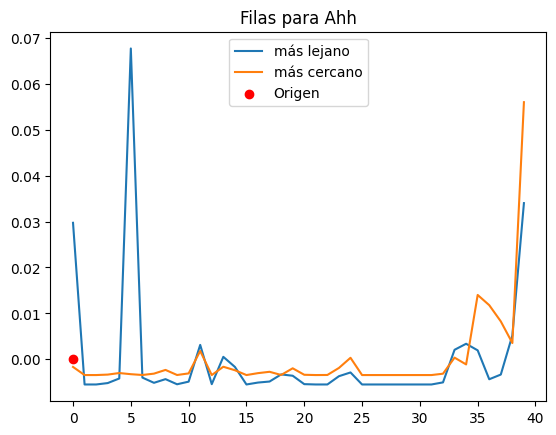

In [73]:
plt.plot(np.arange(40), df_ahh[0], label = "más lejano")
plt.plot(np.arange(40), df_ahh[35], label = "más cercano")
plt.scatter(0, 0, label="Origen", color = "red")
plt.legend()
plt.title("Filas para Ahh")
plt.show()

Al igual que en análisis previos, no podemos afirmar que los datos sean robustos como para dar conclusiones sobre la conexión entre sectores y su distancia al origen.

Sin embargo, podríamos especular que los sectores más alejados correspondan a una mayor producción-demanda, y un rol transversal en la economía. Pero, la información que nos aporta el ACP no es suficiente para comprobar estas hipótesis.